In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%matplotlib nbagg


import os, sys, math

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter
from utils.plots import *
from utils.parameters import create_population_values, set_options

In [22]:


#if Npop==1:
#    inpara['eta'] = [[0.]]
#    inpara['eps'] = [[0.]]
#    inpara['n'] = [[0]]
#else:
#    inpara['eta'] = [[0.],[0.2],[0.5],[0.8],[0.9]]
#    inpara['eps'] = [[0.],[0.1],[0.3],[0.5],[math.sqrt(0.5)]]
#    inpara['n'] = [[0]]
    
#### tau vs nu
# para_order = ['rateWnt','tau_G','alpha_0','n','eps','eta']
# inpara['n'] = [[0],[0],[0]]
# inpara['tau_G'] = [[0,100],[0,100],[0,100]]
# inpara['alpha_0']= [[0.01],[0.02],[0.04]]
# inpara['rateWnt'] = [[0,20],[0,20],[0,20]]

#### alpha vs tau
# para_order = ['tau_G','alpha_0','rateWnt','n','eps','eta']
# inpara['n'] = [[0],[0],[0]]
# inpara['tau_G'] = [[0,100],[0,100],[0,100]]
# inpara['alpha_0'] = [[0,0.1],[0,0.1],[0,0.1]]
# inpara['rateWnt'] = [[1],[2],[5]]

In [11]:
## brief sanity checks on provided parameters
def sanity_check(params,sim_steps):
    for key in params.keys():
        assert type(params[key]) == list, 'Please specify all parameters as lists of lists!'
        assert type(params[key][0]) == list, 'Please specify all parameters as lists of lists!'
        sim_steps = max(sim_steps,len(params[key]))
    return sim_steps

def align_lengths(params,sim_steps):
    for key in params.keys():
        if len(params[key]) == 1:
            params[key]*=sim_steps
        else:
            assert sim_steps == len(params[key]), 'Make sure all parameters are specified as having the same length (%s has length %d / %d)' % (key,len(params[key]),sim_steps)
    return params


def set_option_params(simulation_array):
    
    #sim_steps = 0
    #sim_steps = sanity_check(options_array,sim_steps)
    #sim_steps = sanity_check(simulation_array,sim_steps)

    #options_array = align_lengths(options_array,sim_steps)
    #simulation_array = align_lengths(simulation_array,sim_steps)
    
    options = set_options(L=1,nI=1,nE=0)
    options['mode_stats'] = 1
    
#    for key,val in options_array.items():
#        options[key] = val
    
    options['simulation'] = {}
    for key,val in simulation_array.items():
        options['simulation'][key] = val
    
    return options


def plot_3D(ax,res):
    pass

<IPython.core.display.Javascript object>


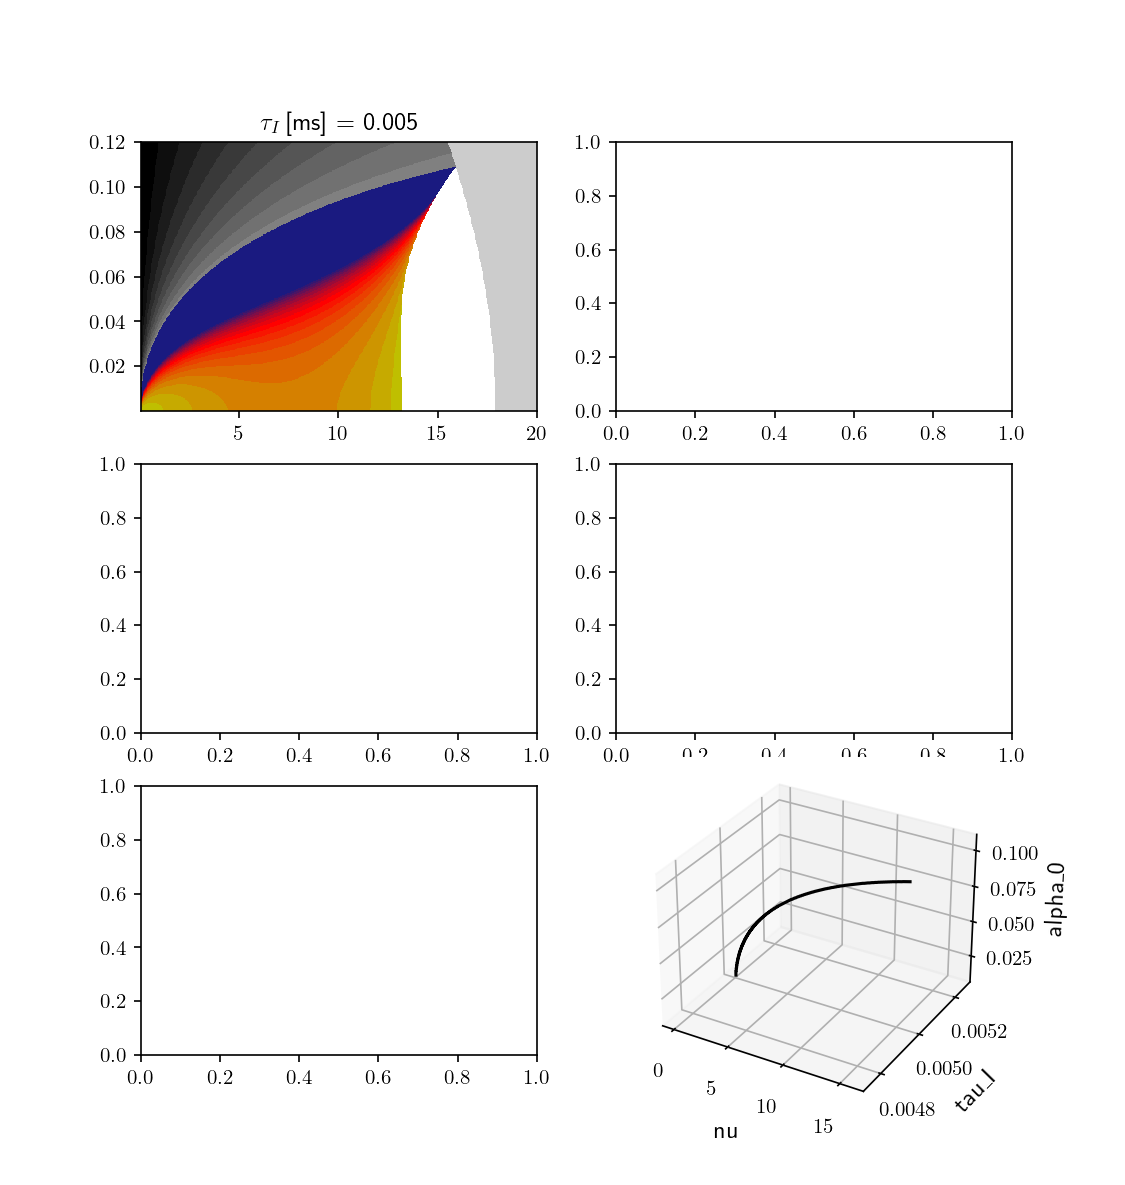

[[447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [447]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [446]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [445]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [444]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [443]
 [442]
 [442]
 [442]

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (500,)  and requested shape (500,1)

In [32]:
%matplotlib nbagg
sim_steps = 5
set_plot_params()
plt_para = {
    'multi': True,#sim_steps > 1,
    'ax_label': [],
    'const_label': []
}

fig, ax = plt.subplots(sim_steps//2+1,2,
        figsize=(7.5,1+2.3*(sim_steps//2+1))
    )
big_ax = fig.add_axes([0.1,0.1,0.8,0.85])
big_ax.set_facecolor('none')
big_ax.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
big_ax.spines[['top','right','bottom','left']].set_visible(False)

pos1 = ax[2][1].get_position() # get the original position
pos2 = [pos1.x0 - 0.1, pos1.y0-0.05,  pos1.width + 0.2, pos1.height + 0.075]
fig.delaxes(ax[2][1])
ax_3D = plt.axes(pos2,projection='3d')
#plt.setp(ax_3D,xlabel='$\displaystyle \bar{\nu}$',ylabel='$\displaystyle \tau_I$',zlabel='$\displaystyle \alpha_0$')
plt.setp(ax_3D,xlabel='nu',ylabel='tau_I',zlabel='alpha_0')


steps = 500

simulation_array = {
    #'rateWnt':[[0,20],[0,15],[0,10],[0,7],[0,6]],#[[0,rate[0]] for rate in (1./(2.*math.pi*np.sqrt(tau_M*np.array(inpara['tau_G']))))
    #'alpha_0': [[0,0.12],[0,0.12],[0,0.12],[0,0.12],[0,0.12]],
    'rateWnt':[0,20],#[[0,rate[0]] for rate in (1./(2.*math.pi*np.sqrt(tau_M*np.array(inpara['tau_G']))))
    'alpha_0': [0,0.12],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}

#results = []
px = 'rateWnt'
py = 'tau_I'
pz = 'alpha_0'

for i,tau_G in enumerate([0.005,0.01,0.02,0.04,0.06]):
    
    options = set_option_params(simulation_array)
    options['tau_I'] = tau_G
    order = [o for o in list(options['simulation']) if not o.startswith('sim')]
    
    res = darkMatter(steps=steps,options=options,cleanup=False,rerun=False,compile=False,logging=3)
    
    ## plotting sharkfins for each solution
    p = 0
    ax_now = ax[i//2,i%2]
    plot_fins(ax_now,res[order[0]],res[order[1]],
              res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],
              plt_para)
    ax_now.set_title('%s = %.3f' % (get_displayString(py),options[py]),fontsize=12)
    
    ## plotting transition points for 3D display
    data_mask = ~res['DM_trans'].mask#[p,:,0]
    ax_3D.plot(
        res[px][res['DM_trans'][data_mask]],
        np.full(data_mask.sum(),options[py]),
        res[pz][np.where(data_mask)[1]],
        ls='-',
        color='k',
    )
    
    data_mask = ~res['inc_trans'].mask
    if not (len(np.array(data_mask).shape)>1):
        data_mask = np.full(steps,True,'bool')
    #print(res['inc_trans'][data_mask])
    #print(res[pz][np.where(data_mask)[0]].shape)
    ax_3D.plot(
        res[px][res['inc_trans'][data_mask]],
        np.full(data_mask.sum(),options[py]),
        res[pz][np.where(data_mask)[0]],
        #s=0.5,
        ls='-',
#        marker='o',
        color='r'
    )
    #results.append(res)
big_ax.set_xlabel(get_displayString(order[0]),fontsize=12)
big_ax.set_ylabel(get_displayString(order[1]),fontsize=12)


simulation_array = {
    'tau_I':[0,0.1],#[[0,rate[0]] for rate in (1./(2.*math.pi*np.sqrt(tau_M*np.array(inpara['tau_G']))))
    'alpha_0': [0,0.12],
    'sim_prim': [0,0,-1],
    'sim_sec': [0,-1,0]
}

const_key = list(options.keys())[0]


for i,rateWnt in enumerate([0.5,1.,2.,5.,10.]):
    
    options = set_option_params(simulation_array)
    options['rateWnt'] = rateWnt
    
    order = [o for o in list(options['simulation']) if not o.startswith('sim')]
    x_key = order[0]
    
    res = darkMatter(steps=steps,options=options,cleanup=False,rerun=False,compile=False,logging=3)
    
    ## plotting transition points for 3D display
    data_mask = ~res['DM_trans'].mask#[p,:,0]
    ax_3D.plot(
        np.full(data_mask.sum(),options[px]),
        res[py][res['DM_trans'][data_mask]],
        res[pz][np.where(data_mask)[1]],
        s=1,
        marker='o',
        color='k'
    )
    
    data_mask = ~res['inc_trans'].mask
    if not (len(np.array(data_mask).shape)>1):
        data_mask = np.full(steps,True,'bool')
    ax_3D.plot(
        np.full(data_mask.sum(),options[px]),
        res[py][res['inc_trans'][data_mask]],
        res[pz][np.where(data_mask)[0]],
        s=0.5,
        marker='o',
        color='r'
    )


simulation_array = {
    'rateWnt': [0,15],
    'tau_I':[0,0.1],#[[0,rate[0]] for rate in (1./(2.*math.pi*np.sqrt(tau_M*np.array(inpara['tau_G']))))
    'sim_prim': [0,-1,0],
    'sim_sec': [0,0,-1]
}

#print(px,py,pz)

for i,alpha_0 in enumerate([0.0,0.01,0.02,0.04,0.1]):
    
    options = set_option_params(simulation_array)
    options['alpha_0'] = alpha_0
    
    order = [o for o in list(options['simulation']) if not o.startswith('sim')]
    x_key = order[0]
    
    res = darkMatter(steps=steps,options=options,cleanup=False,rerun=False,compile=False,logging=3)
    
    ## plotting transition points for 3D display
    data_mask = ~res['DM_trans'].mask#[p,:,0]
    ax_3D.plot(
        res[px][res['DM_trans'][data_mask]],
        res[py][np.where(data_mask)[1]],
        np.full(data_mask.sum(),options[pz]),
        s=1,
        marker='o',
        color='k'
    )
    
    data_mask = ~res['inc_trans'].mask
    if not (len(np.array(data_mask).shape)>1):
        data_mask = np.full(steps,True,'bool')
    ax_3D.plot(
        res[px][res['inc_trans'][data_mask]],
        res[py][np.where(data_mask)[0]],
        np.full(data_mask.sum(),options[pz]),
        s=0.5,
        marker='o',
        color='r'
    )

save = True
if save:
    sv_name = '../figures/shark_steps=%d_%s_%s_drive%d.%s' % (steps,order[0],order[1],drive,file_format)
    plt.savefig(sv_name,dpi=300)
    print('Figure saved as "%s"' % sv_name)

In [148]:


for i,res in enumerate(results):
    p = 0
    ax_now = ax[i//2,i%2]
    plot_fins(ax_now,res[order[0]],res[order[1]],
              res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],
              plt_para)
    ax_now.set_title('%s = %.3f' % (get_displayString(const_key),options_array[const_key][i][0]),fontsize=12)

#if (plt_para['multi']):
#    plot_3d(fig,ax[-1,-1],res,order,plt_para,from_disk=not plot_ax3D)

<IPython.core.display.Javascript object>


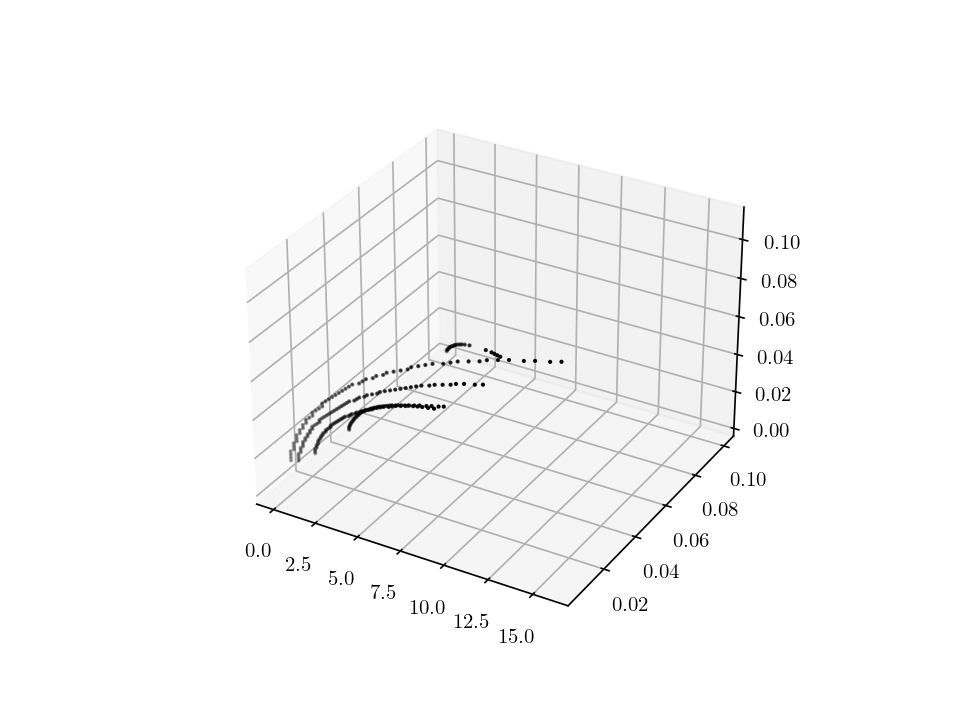

In [92]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

px = order[0]
py = const_key
pz = order[1]

for i,res in enumerate(results):

    data_mask = ~res['DM_trans'].mask#[p,:,0]
    ax.scatter(
        res[px][res['DM_trans'][data_mask]],
        options_array[py][i],
        res[pz][np.where(data_mask)[1]],
        s=1,
        marker='o',
        color='k'
    )
    #DM_bound[i,data_mask[p,:,0]] = res[order[0]][res['DM_trans'][data_mask]]
    #data_3D_DM[i,data_mask[p,:,0],0] = res[order[0]][res['DM_trans'][data_mask]]
    #data_3D_DM[i,data_mask[p,:,0],1] = options_array[py][i]#res[py][data_mask]
    #data_3D_DM[i,data_mask[p,:,0],2] = res[pz][data_mask[p,:,0]]
    
    

plotting 3D axis
[0.0016 0.0032 0.0048 0.0064 0.008  0.0096 0.0112 0.0128 0.0144 0.016
 0.0176 0.0192 0.0208 0.0224 0.024  0.0256 0.0272 0.0288 0.0304 0.032
 0.0336 0.0352 0.0368 0.0384 0.04   0.0416 0.0432 0.0448 0.0464 0.048
 0.0496 0.0512 0.0528 0.0544 0.056  0.0576 0.0592 0.0608 0.0624 0.064
 0.0656 0.0672 0.0688 0.0704 0.072  0.0736 0.0752 0.0768 0.0784 0.08
 0.0816 0.0832 0.0848 0.0864 0.088  0.0896 0.0912 0.0928 0.0944 0.096
 0.0976 0.0992 0.1008 0.1024 0.104  0.1056 0.1072 0.1088 0.1104 0.112
 0.1136 0.1152 0.1168 0.1184 0.12   0.1216 0.1232 0.1248 0.1264 0.128
 0.1296 0.1312 0.1328 0.1344 0.136  0.1376 0.1392 0.1408 0.1424 0.144
 0.1456 0.1472 0.1488 0.1504 0.152  0.1536 0.1552 0.1568 0.1584 0.16  ]


ValueError: shape mismatch: value array of shape (1,100,1) could not be broadcast to indexing result of shape (1,3)

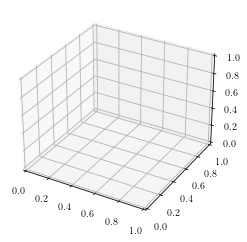

In [73]:
#def plot_3d(fig,ax,results,para_order,plt_para,from_disk=False):

#results = res
#para_order = order
from_disk = False

print("plotting 3D axis")

fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')
px = order[0]
py = const_key
pz = order[1]
#px,pz,py = order[0],order[:3]
if from_disk:
    pos1 = ax.get_position() # get the original position
    pos2 = [pos1.x0 - 0.175, pos1.y0-0.025,  pos1.width + 0.2, pos1.height + 0.075]

    fig.delaxes(ax)
    ax = plt.axes(pos2)

    if (pz == 'tau_G'):
        img=mpimg.imread("./figures/diagram_tau_3D_adjusted.png")
        print("tau")
    if (pz == 'rateWnt'):
        img=mpimg.imread("./figures/diagram_nu_3D_adjusted.png")
        print("rate")
    if (pz == 'alpha_0'):
        img=mpimg.imread("./figures/diagram_alpha_3D_adjusted.png")
        print("alpha")

    ax.imshow(img)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.setp(ax,xticks=[],yticks=[])

else:
    Npop,steps,_ = results[0]['gamma'].shape
    #sim_steps = len(results)
    DM_bound = np.full((sim_steps,steps),np.nan)
    DM_bound_max = np.full((sim_steps,2),np.nan)

    imp_bound = np.full((sim_steps,steps),np.nan)
    inc_bound = np.full((sim_steps,steps),np.nan)
    
    data_3D_inc = np.full((sim_steps,steps,3),np.nan)
    data_3D_DM = np.full((sim_steps,steps,3),np.nan)
    
    ## change position of current axis
    #pos1 = ax.get_position() # get the original position
    #pos2 = [pos1.x0 - 0.1, pos1.y0-0.05,  pos1.width + 0.2, pos1.height + 0.075]

    #fig.delaxes(ax)
    #ax = plt.axes(pos2,projection='3d')

    cross_point = np.zeros(len(results),'int');

    maxPara = {'x':0,'y':0,'z':0}
    for i,res in enumerate(results):

        maxPara['x'] = max(maxPara['x'],np.nanmax(res[px]))
        maxPara['y'] = max(maxPara['y'],np.nanmax(options_array[py]))
        maxPara['z'] = max(maxPara['z'],np.nanmax(res[pz]))
        
        #print(res['DM_trans'])
        #print(res['inc_trans'])
        
        
        data_mask = ~res['DM_trans'].mask#[p,:,0]
        #print(p)
        #print(data_mask)
        #print(res['DM_trans'][p,data_mask,0])
        #print(res[order[0]][res['DM_trans'][data_mask]])
        DM_bound[i,data_mask[p,:,0]] = res[order[0]][res['DM_trans'][data_mask]]
        data_3D_DM[i,data_mask[p,:,0],0] = res[order[0]][res['DM_trans'][data_mask]]
        data_3D_DM[i,data_mask[p,:,0],1] = options_array[py][i]#res[py][data_mask]
        print(res[pz])
        data_3D_DM[i,data_mask[p,:,0],2] = res[pz][data_mask[p,:,0]]

        data_mask = ~res['inc_trans'].mask
        inc_bound[i,data_mask[:,0]] = res[order[0]][res['inc_trans'][0,data_mask]]
        data_3D_inc[i,data_mask[:,0],0] = res[order[0]][res['inc_trans'][data_mask]]
        data_3D_inc[i,data_mask[:,0],1] = res[py]
        data_3D_inc[i,data_mask[:,0],2] = res[pz]

        ax.plot(data_3D_DM[i,:,0],data_3D_DM[i,:,1],data_3D_DM[i,:,2],'k-',lw=2)
        ax.plot(data_3D_inc[i,:,0],data_3D_inc[i,:,1],data_3D_inc[i,:,2],'k-',lw=2)

        # print('crossing point: @')
        cross = np.where(data_3D_DM[i,:,0]>data_3D_inc[i,:,0])[0]
        if len(cross):
            cross_point[i] = np.where((data_3D_DM[i,:,0]>data_3D_inc[i,:,0]) & (~np.isnan(data_3D_DM[i,:,0]) | np.isnan(data_3D_inc[i,:,0])))[0][0]
        else:
            cross_point[i] = np.where(~np.isnan(data_3D_DM[i,:,0]))[0][-1]

    print(maxPara)
    i_arr = np.arange(sim_steps)
    ax.plot(data_3D_inc[i_arr,cross_point,0],data_3D_inc[i_arr,cross_point,1],data_3D_inc[i_arr,cross_point,2],'k-',lw=2)
    ax.plot(data_3D_inc[i_arr,0,0],data_3D_inc[i_arr,0,1],data_3D_inc[i_arr,0,2],'k-',lw=2)
    ax.plot(data_3D_DM[i_arr,0,0],data_3D_DM[i_arr,0,1],data_3D_DM[i_arr,0,2],'k-',lw=2)

    for i in range(sim_steps-1):

        X = np.concatenate((data_3D_DM[i,:,0],np.flipud(data_3D_DM[i+1,:,0])))
        mask = ~np.isnan(X)
        Y = np.concatenate((data_3D_DM[i,:,1],np.flipud(data_3D_DM[i+1,:,1])))
        Z = np.concatenate((data_3D_DM[i,:,2],np.flipud(data_3D_DM[i+1,:,2])))
        X = np.pad(X[mask],1,mode='wrap')
        Y = np.pad(Y[mask],1,mode='wrap')
        Z = np.pad(Z[mask],1,mode='constant',constant_values=0)
        ax.plot_trisurf(X,Y,Z,color='grey',alpha=0.5)

        X = np.concatenate((data_3D_inc[i,:,0],np.flipud(data_3D_inc[i+1,:,0])))
        mask = ~np.isnan(X)
        Y = np.concatenate((data_3D_inc[i,:,1],np.flipud(data_3D_inc[i+1,:,1])))
        Z = np.concatenate((data_3D_inc[i,:,2],np.flipud(data_3D_inc[i+1,:,2])))
        X = np.pad(X[mask],1,mode='wrap')
        Y = np.pad(Y[mask],1,mode='wrap')
        Z = np.pad(Z[mask],1,mode='constant',constant_values=0)
        ax.plot_trisurf(X,Y,Z,color=(0.5,0.5,0.5,0.5),antialiased=True,linewidth=0,edgecolor='none',shade=True)
    ax.azim = -100.
    ax.elev = 20
    # ax.dist = 8

    # ax.set_xticks(np.linspace(inpara[px][0][0],inpara[px][0][1],5))
    # ax.tick_params(axis='x', pad=-5)
    ax.set_yticks(np.linspace(0,maxPara['y'],3))#np.linspace(inpara[para_order[ax_list[2]]][0][0],inpara[para_order[ax_list[2]]][-1][0],5))
    # ax.set_yticklabels(['%d'%(entry[0]) for entry in inpara[pz]],fontsize=12)#np.linspace(inpara[para_order[ax_list[2]]][0][0],inpara[para_order[ax_list[2]]][-1][0],5))
    ax.set_yticklabels(np.linspace(0,maxPara['y'],3), ha='right', rotation_mode="anchor",rotation=20)
    ax.tick_params(axis='y', pad=-2)
    # ax.set_zticks(np.linspace(inpara[pz][0][0],inpara[pz][0][1],5))

    ax.set_xlim([0,maxPara['x']*1.0])
    ax.set_ylim([0,maxPara['y']*1.2])
    ax.set_zlim([0,maxPara['z']*1.1])

    ax.set_xlabel(plt_para['ax_label'][0],labelpad=5)
    ax.set_ylabel(plt_para['ax_label'][2],labelpad=8)#const_labels[0])
    ax.set_zlabel(plt_para['ax_label'][1],ha='left',rotation_mode='anchor',rotation=90,labelpad=5)
    ax.zaxis.set_rotate_label(False)